# Logistic Regression

The purpose of logistic regression is to perform discrete classification among real-valued data. The features or independent variables are real or can be encoded as as real numbers, and the dependent variable takes on discrete values, typically dichotomous/binary.

While we can just model this as linear regression anyway, paying no mind to the fact that our output classes are discrete, the results illustrate some problems with this:

In [1]:
# Awful hack to import past chapter modules
import sys
sys.path.insert(0, "../")

import math, random, tqdm
from linalg import Vector, dot, vector_sum, vector_mean
from stats import standard_deviation
from matplotlib import pyplot as plt
from working_with_data import rescale, scale
from multiple_regression import least_squares_fit, predict, multiple_r_squared
from gradient_descent import gradient_step
from typing import List, Tuple
from machine_learning import train_test_split, precision, recall

In [2]:
# steal joels data: https://github.com/joelgrus/data-science-from-scratch/blob/master/scratch/logistic_regression.py
tuples = [(0.7,48000,1),(1.9,48000,0),(2.5,60000,1),(4.2,63000,0),(6,76000,0),(6.5,69000,0),(7.5,76000,0),(8.1,88000,0),(8.7,83000,1),(10,83000,1),(0.8,43000,0),(1.8,60000,0),(10,79000,1),(6.1,76000,0),(1.4,50000,0),(9.1,92000,0),(5.8,75000,0),(5.2,69000,0),(1,56000,0),(6,67000,0),(4.9,74000,0),(6.4,63000,1),(6.2,82000,0),(3.3,58000,0),(9.3,90000,1),(5.5,57000,1),(9.1,102000,0),(2.4,54000,0),(8.2,65000,1),(5.3,82000,0),(9.8,107000,0),(1.8,64000,0),(0.6,46000,1),(0.8,48000,0),(8.6,84000,1),(0.6,45000,0),(0.5,30000,1),(7.3,89000,0),(2.5,48000,1),(5.6,76000,0),(7.4,77000,0),(2.7,56000,0),(0.7,48000,0),(1.2,42000,0),(0.2,32000,1),(4.7,56000,1),(2.8,44000,1),(7.6,78000,0),(1.1,63000,0),(8,79000,1),(2.7,56000,0),(6,52000,1),(4.6,56000,0),(2.5,51000,0),(5.7,71000,0),(2.9,65000,0),(1.1,33000,1),(3,62000,0),(4,71000,0),(2.4,61000,0),(7.5,75000,0),(9.7,81000,1),(3.2,62000,0),(7.9,88000,0),(4.7,44000,1),(2.5,55000,0),(1.6,41000,0),(6.7,64000,1),(6.9,66000,1),(7.9,78000,1),(8.1,102000,0),(5.3,48000,1),(8.5,66000,1),(0.2,56000,0),(6,69000,0),(7.5,77000,0),(8,86000,0),(4.4,68000,0),(4.9,75000,0),(1.5,60000,0),(2.2,50000,0),(3.4,49000,1),(4.2,70000,0),(7.7,98000,0),(8.2,85000,0),(5.4,88000,0),(0.1,46000,0),(1.5,37000,0),(6.3,86000,0),(3.7,57000,0),(8.4,85000,0),(2,42000,0),(5.8,69000,1),(2.7,64000,0),(3.1,63000,0),(1.9,48000,0),(10,72000,1),(0.2,45000,0),(8.6,95000,0),(1.5,64000,0),(9.8,95000,0),(5.3,65000,0),(7.5,80000,0),(9.9,91000,0),(9.7,50000,1),(2.8,68000,0),(3.6,58000,0),(3.9,74000,0),(4.4,76000,0),(2.5,49000,0),(7.2,81000,0),(5.2,60000,1),(2.4,62000,0),(8.9,94000,0),(2.4,63000,0),(6.8,69000,1),(6.5,77000,0),(7,86000,0),(9.4,94000,0),(7.8,72000,1),(0.2,53000,0),(10,97000,0),(5.5,65000,0),(7.7,71000,1),(8.1,66000,1),(9.8,91000,0),(8,84000,0),(2.7,55000,0),(2.8,62000,0),(9.4,79000,0),(2.5,57000,0),(7.4,70000,1),(2.1,47000,0),(5.3,62000,1),(6.3,79000,0),(6.8,58000,1),(5.7,80000,0),(2.2,61000,0),(4.8,62000,0),(3.7,64000,0),(4.1,85000,0),(2.3,51000,0),(3.5,58000,0),(0.9,43000,0),(0.9,54000,0),(4.5,74000,0),(6.5,55000,1),(4.1,41000,1),(7.1,73000,0),(1.1,66000,0),(9.1,81000,1),(8,69000,1),(7.3,72000,1),(3.3,50000,0),(3.9,58000,0),(2.6,49000,0),(1.6,78000,0),(0.7,56000,0),(2.1,36000,1),(7.5,90000,0),(4.8,59000,1),(8.9,95000,0),(6.2,72000,0),(6.3,63000,0),(9.1,100000,0),(7.3,61000,1),(5.6,74000,0),(0.5,66000,0),(1.1,59000,0),(5.1,61000,0),(6.2,70000,0),(6.6,56000,1),(6.3,76000,0),(6.5,78000,0),(5.1,59000,0),(9.5,74000,1),(4.5,64000,0),(2,54000,0),(1,52000,0),(4,69000,0),(6.5,76000,0),(3,60000,0),(4.5,63000,0),(7.8,70000,0),(3.9,60000,1),(0.8,51000,0),(4.2,78000,0),(1.1,54000,0),(6.2,60000,0),(2.9,59000,0),(2.1,52000,0),(8.2,87000,0),(4.8,73000,0),(2.2,42000,1),(9.1,98000,0),(6.5,84000,0),(6.9,73000,0),(5.1,72000,0),(9.1,69000,1),(9.8,79000,1),]
data = [list(row) for row in tuples]

xs = [[1.0] + row[:2] for row in data]  # [1, experience, salary]
ys = [row[2] for row in data]           # paid_account

In [3]:
# rescale the inputs
rescaled_xs = rescale(xs)

Quick loot at the data: we are trying to predict paid (1.0) and unpaid users (0.0) for ys from experience (years, and salary)

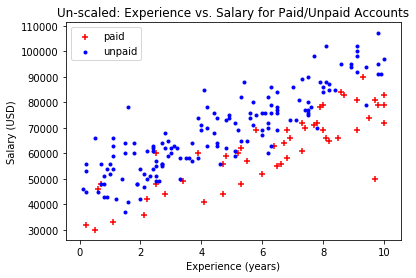

In [4]:
# plot the data w/o rescaling:
paid_exp = [x[1] for (x, y) in zip(xs, ys) if y == 1.0]
paid_sal = [x[2] for (x, y) in zip(xs, ys) if y == 1.0]
plt.scatter(paid_exp, paid_sal, color='red', marker='+', label='paid')
unpaid_exp = [x[1] for (x, y) in zip(xs, ys) if y == 0.0]
unpaid_sal = [x[2] for (x, y) in zip(xs, ys) if y == 0.0]
plt.scatter(unpaid_exp, unpaid_sal, color='blue', marker='.', label='unpaid')
plt.legend()
plt.title('Un-scaled: Experience vs. Salary for Paid/Unpaid Accounts')
plt.xlabel('Experience (years)')
plt.ylabel('Salary (USD)')
plt.show()


You can see that it looks like our data is somewhat separable (in this case likely with a straight line vs. a higher degree polynomial). How does it looks rescaled? Shouldn't matter really other than axes.

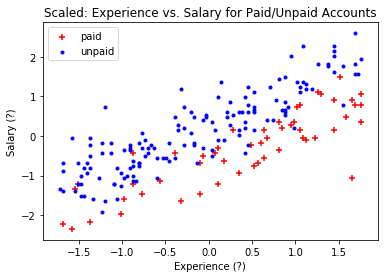

In [5]:
# Same thing, but scale it first
paid_exp = [x[1] for (x, y) in zip(rescaled_xs, ys) if y == 1.0]
paid_sal = [x[2] for (x, y) in zip(rescaled_xs, ys) if y == 1.0]
plt.scatter(paid_exp, paid_sal, color='red', marker='+', label='paid')
unpaid_exp = [x[1] for (x, y) in zip(rescaled_xs, ys) if y == 0.0]
unpaid_sal = [x[2] for (x, y) in zip(rescaled_xs, ys) if y == 0.0]
plt.scatter(unpaid_exp, unpaid_sal, color='blue', marker='.', label='unpaid')
plt.legend()
plt.title('Scaled: Experience vs. Salary for Paid/Unpaid Accounts')
plt.xlabel('Experience (?)')
plt.ylabel('Salary (?)')
plt.show()

In [6]:
def predicted_vs_actual(predictions: List[float], ys: List[float]):
    plt.scatter(predictions, ys, marker='+')
    plt.xlabel("Predictions")
    plt.ylabel("Actual")
    plt.show()

least squares fit: 100%|██████████| 1000/1000 [00:01<00:00, 702.30it/s]


Beta: [0.25540542694729595, 0.4374046212728991, -0.4271055063462302]
R^2:  0.43117258591036894


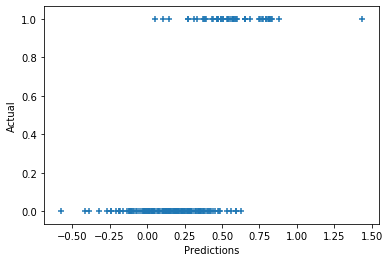

In [7]:
# learn from the rescaled data and plot
lr = 0.001
beta = least_squares_fit(rescaled_xs, ys, lr, 1000, 1)
predictions = [predict(x_i, beta) for x_i in rescaled_xs]
print("Beta:", beta)
print("R^2: ", multiple_r_squared(rescaled_xs, ys, beta))
predicted_vs_actual(predictions, ys)

least squares fit: 100%|██████████| 1000/1000 [00:01<00:00, 684.88it/s]


Beta: [nan, nan, nan]
R^2:  nan


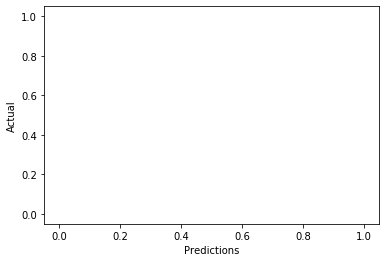

In [8]:
# Out of curiousity, how does non-rescaled perform?
lr = 0.001
beta_no_rs = least_squares_fit(xs, ys, lr, 1000, 1)
predictions_no_rs = [predict(x_i, beta_no_rs) for x_i in xs]
print("Beta:", beta_no_rs)
print("R^2: ", multiple_r_squared(xs, ys, beta_no_rs))
predicted_vs_actual(predictions_no_rs, ys)

Answer: terribly. Re-scaling can be essential to success with gradient based optimization at just 1-layer

### Back to the point

The linear regression *kind of* works if we interpret the predicted value to be a probabilty estimate that it is a paid (1.0) account vs. an unpaid (0.0) account. But what if the predicted value is < 0 or > 1? 

Furthermore, the linear regression model *assumes the error terms are un-correlated with the columns of x*. Since our output variable is on $(-\infty, \infty)$ instead of $[0, 1]$, then high values of one feature in x necessarily create larger error terms: the linear model presumes that if more experience leads to higher paid account probability, that no matter the value of experience  incrementally more will lead to more likelihood. This isn't true beyond an estimate of 1.0, and the error term instead gets worse, such that high values of experience correlate with high values of the error term: **the data is heteroskedatic in terms of experience and so our estimate of $\beta$ is biased (we may understimate the value of experience to accomodate for the range issues)**.

### How to address?

What we'd like is to predict in the range of $[0, 1]$, such that higher values of experience bring our predictions closer and closer to 1, instead of overshooting the range of meaningful values. So we use the logisitc function on our output values:

In [9]:
def logistic(x: float) -> float:
    """
    the matehematical logistic function
    """
    return 1.0 / (1  + math.exp(-x))

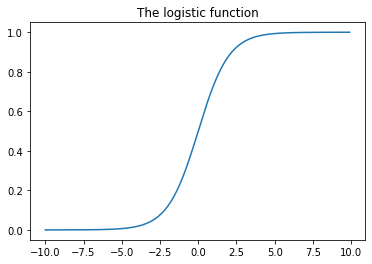

In [10]:
plt.title("The logistic function")
log_xs = [x / 10. for x in range(-100, 100, 1)]
log_ys = [logistic(x) for x in log_xs]
plt.plot(log_xs, log_ys)
plt.show()

In [11]:
def logisitic_prime(x: float) -> float:
    """
    derivative of the logisitic function w.r.t. x
    """
    y = logistic(x)
    return y * (1 - y)

#### How do we get a MLE estimate for our data with the logisitic output?

In linear regression, minimizing the sum of squared errors maximized the likelihood of the data, but this isn't true for logisitic regression. Instead we'll derive the equation we need to minimize in order to provide an MLE for the logistic function:

1. Let $f(x)$ be the logistic function: $$f(x) = \frac{1}{1 + e^{-x}}$$
2. Then we are attempting to fit the model $$y_i = f(x_i\beta) + \epsilon_i$$
3. In binary classification with this model: $$p(y_i = 1 | x_i, \beta) = f(x_i\beta)$$ and $$p(y_i = 0 | x_i, \beta) = 1 - f(x_i\beta)$$
4. Since we are classifying between 1 and 0, we can combine to encode a PDF for $y_i$ like so: $$p(y_i | x_i, \beta) = f(x_i\beta)^{y_i} * (1 - f(x_i\beta))^{(1 - y_i)}$$
  1. This is because when $y_i = 1$, the second term is cancelled, and visa-versa when $y_i=0$
5. We want to provide the $\beta$ which maximizes this w.r.t. $x_i, y_i$

A likelihood $L(\beta)$ is a function with respect to data $(x, y)$ determining how likely a parameter $\beta$ is to hold a given value given a particular dataset $(x, y)$ and the presumption that $y = g(x, \beta)$ where $g$ is some modeling function (e.g. logistic regression). It turns out we can also use this to express our likelihood:

It is not clear why (or if this is generally true) that $p(y_i | x_i, \beta) == L(\beta | x_i, y_i)$, but it supposedly does. Given the the likelihood is equivalent to:


$$L(\beta) = f(x_i\beta)^{y_i} * (1 - f(x_i\beta))^{(1 - y_i)}$$

We can also choose to maximize the log-likelihood, since it is strictly monotonic w.r.t. likelihood and easier to work with:

$$\log(L(\beta)) = y_i\log(f(x_i\beta)) * (1 - y_i)\log((1 - f(x_i\beta)))$$

$$\log(L(\beta)) = y_i\log(f(x_i\beta)) * (1 - y_i)\log((1 - f(x_i\beta)))$$

For tradition, we'll use *negative log likelihood:*

$$-\log(L(\beta)) = -y_i\log(f(x_i\beta)) + (y_i - 1)\log((1 - f(x_i\beta)))$$

This preserves our negation property when y = 1 or 0, so we can use each term in code via if/else:

In [12]:
def _neg_log_likelihood(x: Vector, y: float, beta: Vector) -> float:
    """
    The negative log-likelihood for logisitic regression w.r.t. a single data point
    """
    if y == 1:
        return -math.log(logistic(dot(x, beta)))
    else: 
        return -math.log(1 - logistic(dot(x, beta)))

For i.i.d data (a broadly used but not always true assumption), the likelihood for all data points is just the product of the likelihood for each, making the log-likelihood for all the sum of the log likelihood for each:

In [13]:
def neg_log_likelihood(xs: List[Vector], ys: List[float], beta: Vector) -> float:
    """
    The negative log-likelihood for logisitic regression w.r.t. a full dataset $(xs, ys)$
    """
    return sum(_neg_log_likelihood(x, y, beta) for (x, y) in zip(xs, ys))


It turns out the derivative can't be solved for, but we can instead use gradient descent to get its minimum:

In [14]:
def _negative_log_partial_j(x: Vector, y: float, beta: Vector, j: int) -> float:
    """
    The jth partial derivative of a single datapoint produced by y = logistic(dot(x, beta))
    """
    # TODO: why this value?
    return -(y - logistic(dot(x, beta))) * x[j]

def _negative_log_gradient(x: Vector, y: float, beta: Vector) -> Vector:
    """
    The gradient w.r.t. each beta parameter for a single point
    """
    return [_negative_log_partial_j(x, y, beta, j) 
            for j in range(len(beta))]

def negative_log_gradient(xs: List[Vector], ys: List[float], beta: Vector) -> Vector:
    """
    The gradient w.r.t. each beta parameter for an entire dataset
    """
    return vector_sum([_negative_log_gradient(x, y, beta)
                       for x, y in zip(xs, ys)])

### Applying the model

Given the gradient for maximizing the negative log likelihood, we can now optimize with gradient descent:

In [15]:
def logistic_regression_fit(xs: List[Vector], ys: List[float], lr: float = 0.01, epochs: int = 5000, 
                            random_seed: int = 0) -> Vector:
    """
    return the parameters $\beta$ of a logistic regression model relating xs, ys fit with gradient descent for
    {@code epochs} epochs with a learning rate of {@code lr}
    """
   # if random_seed:
    #    random.seed(0)
    # random initial guess
    beta: Vector = [random.random() for _ in range(len(xs[0]))]
    # out of laziness (of the developer), we'll just do gradient descent on the whole dataset instead of SGD
    with tqdm.trange(epochs) as t:
        for epoch in t:
            gradient: Vector = negative_log_gradient(xs, ys, beta)
            beta = gradient_step(beta, gradient, -lr)
            loss = neg_log_likelihood(xs, ys, beta)
            t.set_description(f"loss {loss:.3f} beta: {beta})")
    return beta    

In [16]:
# split the data
random.seed(0)
train_xs, test_xs, train_ys, test_ys = train_test_split(rescaled_xs, ys, .33)

In [17]:
# run a logistic regression
beta = logistic_regression_fit(train_xs, train_ys)
print(beta)

loss 18.036 beta: [-2.2379661388527965, 4.5934839019175895, -4.967550799592643]): 100%|██████████| 5000/5000 [00:06<00:00, 807.29it/s] 

[-2.2379661388527965, 4.5934839019175895, -4.967550799592643]


These coefficients are for the scaled data, but we can return to un-biased coefficients for the un-scaled data by un-scaling:

In [18]:
means, stdevs = scale(xs)
# note the bias term compotation complexity
beta_unscaled = [(beta[0] - beta[1] * means[1] / stdevs[1] - beta[2] * means[2] / stdevs[2]),
                     beta[1] / stdevs[1],
                     beta[2] / stdevs[2]]

Unlike linear regression, the impact of a given parameter depends on the value of the other parameters: it can't in this case be said that a rescaled parameter that is 2x another has 2x the impact: if the if the first n - 1 parameters produce a logistic value near the boundary, a large value of the last may still only have a small impact, where this is not true if the logistic-thus-far would only produce something near ~.5

### Goodness of Fit

In [19]:
# lets compute a confusion matrix
tp = fp = tn = fn = 0.0
for (x, y) in zip(test_xs, test_ys):
    prediction = logistic(dot(x, beta))
    if prediction >= 0.5:
        # positives
        if y == 1:
            tp += 1
        else: 
            fp += 1
    else:
        if y == 0:
            tn += 1
        else:
            fn += 1
prec = precision(tp, fp, fn, tn)
rec = recall(tp, fp, fn, tn)
print(f"Precision: {prec:.3f}, Recall: {rec:.3f}")

Precision: 0.750, Recall: 0.636


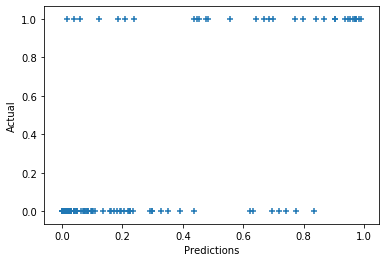

In [20]:
# we can also plot predicted vs. actual
test_ps = [logistic(dot(x, beta)) for x in test_xs]
predicted_vs_actual(test_ps, test_ys)

As a side effect of finding the best logistic regression model, we have also defined a hyper-plane that best separates our data: the decision boundary is wherever `f(x) = logistic(dot(x, beta) = 0`

range(0, 12) [34481.92885801762, 39527.62881934894, 44573.328780680255, 49619.02874201157, 54664.72870334289, 59710.428664674204, 64756.12862600551, 69801.82858733683, 74847.52854866814, 79893.22850999946, 84938.92847133079, 89984.6284326621]


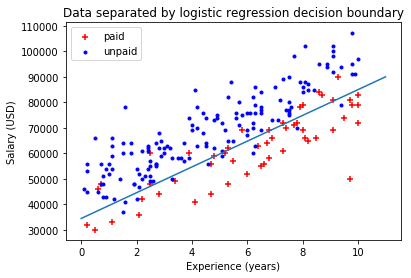

In [21]:
paid_exp = [x[1] for (x, y) in zip(xs, ys) if y == 1.0]
paid_sal = [x[2] for (x, y) in zip(xs, ys) if y == 1.0]
plt.scatter(paid_exp, paid_sal, color='red', marker='+', label='paid')
unpaid_exp = [x[1] for (x, y) in zip(xs, ys) if y == 0.0]
unpaid_sal = [x[2] for (x, y) in zip(xs, ys) if y == 0.0]
plt.scatter(unpaid_exp, unpaid_sal, color='blue', marker='.', label='unpaid')
dec_xs =  range(0, 12)
dec_ys =  [-(beta_unscaled[1]*x + beta_unscaled[0]) / 
           beta_unscaled[2] for x in dec_xs]
print(dec_xs, dec_ys)
plt.plot(dec_xs, dec_ys)
plt.legend()
plt.title('Data separated by logistic regression decision boundary')
plt.xlabel('Experience (years)')
plt.ylabel('Salary (USD)')
plt.show()

This priciple of the seaparating hyperplane is the idea behind SVMs, where the distance between this plane and datapoints are maximized. SVMS-from-scratch is out of scope due to the optimization requirements, but some ideas and terms for recollection:

Sometimes data isn't separable in one plane but is in another higher dimmension, e.g:

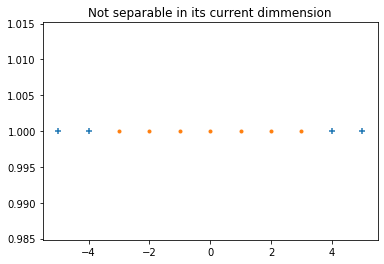

In [22]:
xs = range(-5, 6)
ys = [1 if x**2 > 12.5 else 0 for x in xs]
plt.title('Not separable in its current dimmension')
positives = [x for (x, y) in zip(xs, ys) if y == 1]
negatives = [x for (x, y) in zip(xs, ys) if y == 0]
pos_ys = [1 for _ in positives]
neg_ys = [1 for _ in negatives]
plt.scatter(positives, pos_ys, marker='+', label='positives')
plt.scatter(negatives, neg_ys, marker='.', label='negatives')
plt.show()

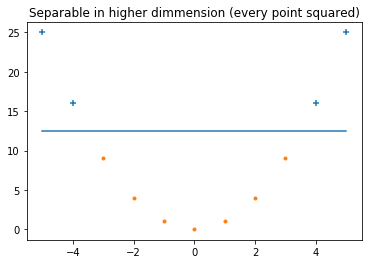

In [23]:
xs = range(-5, 6)
ys = [1 if x**2 > 12.5 else 0 for x in xs]
plt.title('Separable in higher dimmension (every point squared)')
positives = [x for (x, y) in zip(xs, ys) if y == 1]
negatives = [x for (x, y) in zip(xs, ys) if y == 0]
pos_ys = [x**2 for x in positives]
neg_ys = [x**2 for x in negatives]
plt.scatter(positives, pos_ys, marker='+', label='positives')
plt.scatter(negatives, neg_ys, marker='.', label='negatives')
plt.plot(range(-5, 6), [12.5 for _ in range(-5, 6)])
plt.show()

**Kernel Trick**: Allows us to compute the dot products in this higher dimmension without first performing this expensive mapping. Not illustrating the trick here, but that is the premise.